source: https://www.kaggle.com/hoonkeng/deep-analysis-on-youtube-trending-videos-eda/notebook


In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
filepath1 = 'dataframe.csv' #if file is not in same dir as notebook, must change path
filepath2 = 'dataframe_all_timestamps.csv' #if file is not in same dir as notebook, must change path

df = pd.read_csv(filepath1)
df_all_timestamps = pd.read_csv(filepath2)

In [67]:
def stringify(row):
    return str(row['publish_date']) + ' ' + str(row['publish_time'])

df_all_timestamps.loc[:,'string_date_time'] = \
                            df_all_timestamps.apply(stringify, axis=1)

df_all_timestamps.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df_all_timestamps['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')

df_all_timestamps = df_all_timestamps.drop('string_date_time', axis=1)


#make a new column in df called 'publish_timestamp' 
#that is a datetime object

df.loc[:,'string_date_time'] = df.apply(stringify, axis=1)
df.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')
df = df.drop('string_date_time', axis=1)

In [68]:
#optional
# makes new columns by taking the logarithm of the views, likes, 
#dislikes and comment_count to compress the scale for easier graphing 

import numpy as np
df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

In [69]:
df.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count,tags_list
0,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR,2017-11-12 17:58:57,9.877554,7.375882,3.178054,5.375278,"[voxmakers, fermez la, alert spoiler, matthew ..."
1,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR,2017-11-12 13:46:18,9.940061,6.940222,6.326149,5.497168,"[vide grenier, vide grenier live, brocante, je..."
2,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR,2017-11-12 19:08:08,12.242660,7.255591,5.003946,4.510860,"[قناة أخبار اليوم, يومية المغرب, دولية, قضية ا..."
3,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR,2017-11-13 19:58:33,9.674074,4.962845,2.397895,2.079442,"[مسلسل عروس اسطنبول, عروس اسطنبول, عروس اسطنبو..."
4,u6EoWM2KMPE,2017-11-14,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Top Channel Albania,23,Comedy,2017-11-13,13:33:26,"Portokalli""|""Comedy Show""|""Top Channel Albania...",100607,1159,48,35,https://i.ytimg.com/vi/u6EoWM2KMPE/default.jpg,False,False,False,http://top-channel.tv/programe/portokalli/,FR,2017-11-13 13:33:26,11.518987,7.056175,3.891820,3.583519,"[portokalli, comedy show, top channel albania,..."


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 24 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

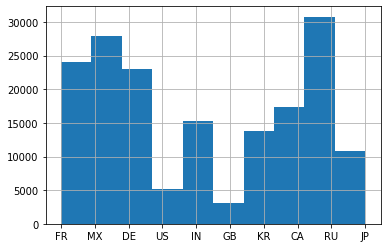

In [70]:
df['country'].hist()

In [ ]:
#The graph above denotes the country with the most entries
#Russia being #1, not necessarily within my scope of interest I decided to frame my analysis on Mexico as:
#1) I am latino 2)I don't speak russian, but wanted a wide dataset to go off of. 
#What is it that this graph denotes? In being Mexico behind Russia. 
#What do Mexicans use Youtube for? And why do they use it? 
#The increased number of entries denotes that their affinity towards media is avid, and they create as much as they view

# Which categories and topics create most traction in Youtube Mexico df?

In [181]:
# Mexico Dataframe
#Mexico is the most advanced country in Latin_America. Their capabilities of producing media has been historically remarkable and they are at the top of many of the franchises.
#not to mention their popularity in creating the genre of tele novela and comedic classics

mexico = df['country'] == 'MX'

df_mexico = df[mexico]
df_mexico

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count,tags_list
29,O9g-hqEnfUo,2017-11-14,FUERTE TEMBLOR EN IRAK HOY 12 DE NOVIEMBRE 21...,Noticias Mundiales 2017,22,People & Blogs,2017-11-12,22:23:08,FUERTE TEMBLOR EN IRAK HOY 12 DE NOVIEMBRE 210...,43849,111,49,18,https://i.ytimg.com/vi/O9g-hqEnfUo/default.jpg,False,False,False,FUERTE TEMBLOR EN IRAK HOY 12 DE NOVIEMBRE 21...,MX,2017-11-12 22:23:08,10.688530,4.718499,3.912023,2.944439,[fuerte temblor en irak hoy 12 de noviembre 21...
30,0pNCxK0Hdl8,2017-11-14,DECORACIONES PARA NAVIDAD - IDEAS PARA DECORAR...,Silvia en tu Vida,1,Film & Animation,2017-11-13,15:00:00,"DECORACIONES PARA NAVIDAD|""IDEAS PARA DECORAR ...",11553,1225,44,276,https://i.ytimg.com/vi/0pNCxK0Hdl8/default.jpg,False,False,False,Buenos días Reynas !! Hoy les traigo el\nPrime...,MX,2017-11-13 15:00:00,9.354787,7.111512,3.806662,5.624018,"[decoraciones para navidad, ideas para decorar..."
31,Dx7S34lNt6A,2017-11-14,PARA TI 🎁...con todo el amor de mi corazón Ábrelo,Frases de Amor,22,People & Blogs,2017-11-13,13:00:01,"frases de amor|""frases bonitas""|""frases de amo...",41887,1138,48,39,https://i.ytimg.com/vi/Dx7S34lNt6A/default.jpg,False,False,False,Para ti 🎁... con todo el amor de mi corazón Áb...,MX,2017-11-13 13:00:01,10.642755,7.037906,3.891820,3.688879,"[frases de amor, frases bonitas, frases de amo..."
32,QSwlPz3ruYA,2017-11-14,Caballo Sereno despide emotivamente a su dueño...,top virar,22,People & Blogs,2017-11-13,17:12:40,Caballo Sereno despide emotivamente a su dueño...,11633,191,13,5,https://i.ytimg.com/vi/QSwlPz3ruYA/default.jpg,False,False,False,"APOYAME EN PATREON, ES IMPORTANTE: https://www...",MX,2017-11-13 17:12:40,9.361687,5.257495,2.639057,1.791759,[caballo sereno despide emotivamente a su dueñ...
33,Nfd31XfFZ94,2017-11-14,"GASTE 10,000 DOLARES EN MI NUEVO MUSIC VIDEO",Aaron Echeverria,22,People & Blogs,2017-11-13,03:59:04,"hotspanish|""hotspanish vlogs""|""video oficial""|...",61222,3982,172,448,https://i.ytimg.com/vi/Nfd31XfFZ94/default.jpg,False,False,False,"GASTE 10,000 DOLARES EN MI NUEVO MUSIC VIDEO\n...",MX,2017-11-13 03:59:04,11.022278,8.289791,5.153292,6.107023,"[hotspanish, hotspanish vlogs, video oficial, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170901,ohO_3RcXc_M,2018-06-14,Boda Sin Travesti 😩🏃‍♂️👯 | Caso Cerrado | Tele...,Caso Cerrado,24,Entertainment,2018-06-12,23:00:02,"Telemundo|""doctora ana maria polo""|""batallas l...",185263,1515,219,364,https://i.ytimg.com/vi/ohO_3RcXc_M/default.jpg,False,False,False,Video oficial del controvertido programa de Te...,MX,2018-06-12 23:00:02,12.129537,7.323831,5.393628,5.899897,"[telemundo, doctora ana maria polo, batallas l..."
170902,cHlzOeiJJQQ,2018-06-14,أقوى مشاهد قيادة تحبس الأنفاس صورتها عدسات الك...,BLA BLA,27,Education,2018-05-31,10:00:09,[none],4829416,20084,4796,1221,https://i.ytimg.com/vi/cHlzOeiJJQQ/default.jpg,False,False,False,أقوى مشاهد قيادة تحبس الأنفاس صورتها عدسات الك...,MX,2018-05-31 10:00:09,15.390236,9.907729,8.475746,7.108244,[[none]]
170903,i7r_kMbyngk,2018-06-14,AMLO llegó con su esposa al Tercer Debate en M...,AMX,25,News & Politics,2018-06-13,01:15:08,"AMLO|""morena""|""política""|""PRI""|""PAN""|""PRD""|""Ló...",121674,3558,58,491,https://i.ytimg.com/vi/i7r_kMbyngk/default.jpg,False,False,False,AMLO llegó con su esposa al Tercer Debate en M...,MX,2018-06-13 01:15:08,11.709109,8.177235,4.077537,6.198479,"[amlo, morena, política, pri, pan, prd, lópez ..."
170904,_jnwjdMe3Zo,2018-06-14,Maire usa una blusa kawaiii ¿adorable o ridícula?,Historias Wink,24,Entertainment,2018-06-13,15:08:53,"maire|""maire vs el internet""|""maire vs interne...",14067,538,6,90,https://i.ytimg.com/vi/_jnwjdMe3Zo/default.jpg,False,False,

In [74]:
df_mexico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27900 entries, 29 to 170906
Data columns (total 25 columns):
video_id                  27900 non-null object
trending_date             27900 non-null object
title                     27900 non-null object
channel_title             27900 non-null object
category_id               27900 non-null int64
category                  27900 non-null object
publish_date              27900 non-null object
publish_time              27900 non-null object
tags                      27900 non-null object
views                     27900 non-null int64
likes                     27900 non-null int64
dislikes                  27900 non-null int64
comment_count             27900 non-null int64
thumbnail_link            27900 non-null object
comments_disabled         27900 non-null bool
ratings_disabled          27900 non-null bool
video_error_or_removed    27900 non-null bool
description               27900 non-null object
country                   27900 non-

In [246]:
engagement = df_mexico[['log_likes','log_comment_count','log_views']]

In [247]:
engagement.describe()

,log_likes,log_comment_count,log_views
count,27900.000000,27900.000000,27900.000000
mean,7.037561,5.042641,10.759241
std,2.125853,2.054325,1.569439
min,0.000000,0.000000,5.062595
25%,5.655992,3.663562,9.581611
50%,6.979145,5.105945,10.686647
75%,8.535033,6.469250,11.855044
max,14.114855,12.728864,16.963607


# 

In [213]:
df_mexico.groupby('category')['log_likes'].max().sort_values(ascending=False)

category
Entertainment            14.114855
Music                    13.790508
People & Blogs           13.470884
Comedy                   13.385028
Howto & Style            12.661505
Sports                   12.583735
Gaming                   12.107831
Film & Animation         11.848047
Autos & Vehicles         11.751879
Travel & Events          11.489810
News & Politics          11.268252
Science & Technology     11.039941
Pets & Animals           10.687206
Education                10.322198
Nonprofits & Activism     8.608860
Shows                     5.913503
Name: log_likes, dtype: float64

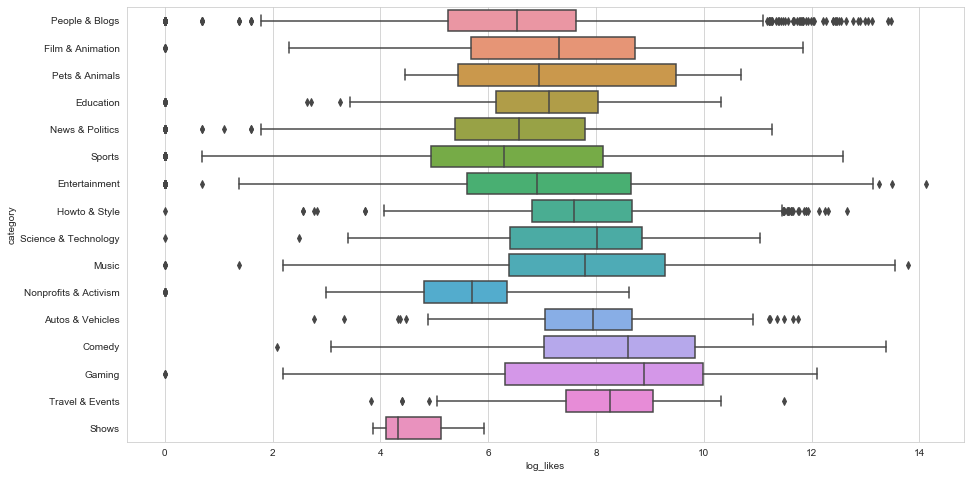

In [249]:
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.boxplot(data = df_mexico, x = 'log_likes', y = 'category')

# TOP LIKED CATEGORIES
# Entertainment
# Music
# People & Blogs


In [211]:
df_mexico.groupby('category')['log_comment_count'].max().sort_values(ascending=False)

category
Comedy                   12.728864
Entertainment            12.251094
People & Blogs           11.823618
Music                    11.712030
Howto & Style            11.538457
Gaming                   10.710365
Sports                   10.439776
Autos & Vehicles         10.272427
News & Politics          10.052252
Film & Animation          9.631548
Science & Technology      9.441293
Travel & Events           9.345745
Education                 9.118773
Pets & Animals            8.679142
Nonprofits & Activism     7.499423
Shows                     5.493061
Name: log_comment_count, dtype: float64

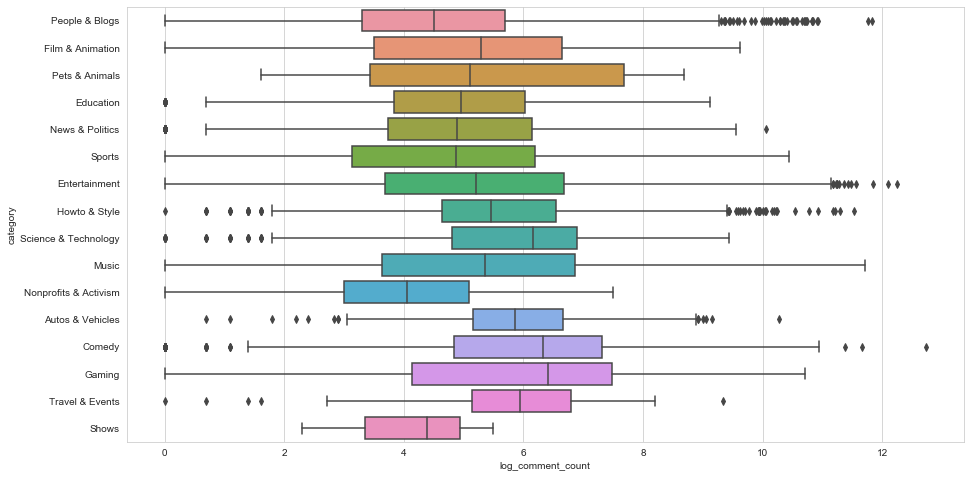

In [209]:
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.boxplot(data = df_mexico, x = 'log_comment_count', y = 'category')

# TOP Commented Categories
# Comedy
# Entertainment
# People & Blogs

In [209]:
df_mexico.groupby('category')['log_views'].max().sort_values(ascending=False)

category
Music                    16.963607
News & Politics          16.893589
Entertainment            16.088644
People & Blogs           16.006133
Comedy                   15.853942
Film & Animation         15.508188
Education                15.390236
Pets & Animals           15.173125
Sports                   15.011260
Gaming                   14.813515
Howto & Style            14.617264
Autos & Vehicles         14.529871
Science & Technology     14.401905
Travel & Events          14.295211
Nonprofits & Activism    13.737931
Shows                    10.962666
Name: log_views, dtype: float64

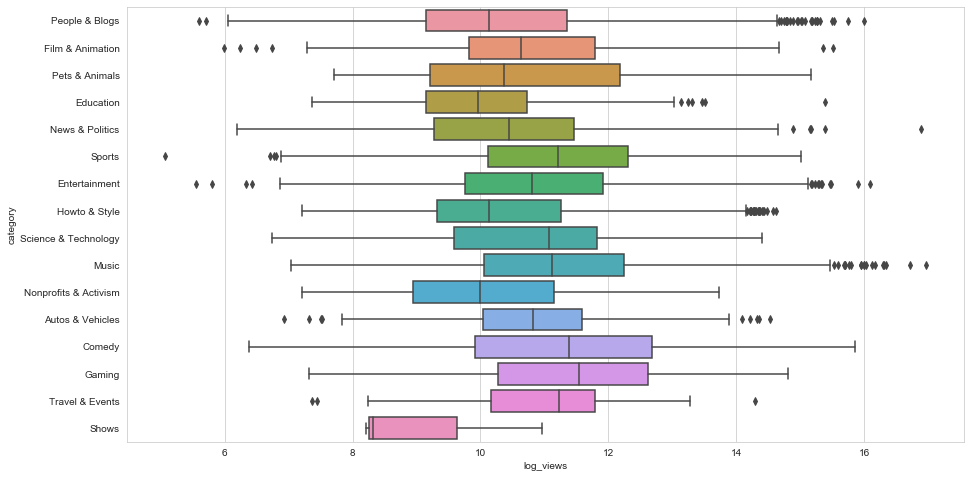

In [208]:
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.boxplot(data = df_mexico, x = 'log_views', y = 'category')

# TOP  VIEWED CATEGORIES
# Music
# News And Politics
# Entertainment

In [149]:
mexico = df['country'] == 'MX'

df_mexico = df[mexico]

df_mexico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27900 entries, 29 to 170906
Data columns (total 25 columns):
video_id                  27900 non-null object
trending_date             27900 non-null object
title                     27900 non-null object
channel_title             27900 non-null object
category_id               27900 non-null int64
category                  27900 non-null object
publish_date              27900 non-null object
publish_time              27900 non-null object
tags                      27900 non-null object
views                     27900 non-null int64
likes                     27900 non-null int64
dislikes                  27900 non-null int64
comment_count             27900 non-null int64
thumbnail_link            27900 non-null object
comments_disabled         27900 non-null bool
ratings_disabled          27900 non-null bool
video_error_or_removed    27900 non-null bool
description               27900 non-null object
country                   27900 non-

# KEYWORDS / tags

In [204]:
#tag list analysis
#Create a column that lists tags to be used for 

df.loc[:,'tags_list'] = df['tags'].str.lower().str.replace(r'"','').str.split('|')
df['tags_list']

0         [voxmakers, fermez la, alert spoiler, matthew ...
1         [vide grenier, vide grenier live, brocante, je...
2         [قناة أخبار اليوم, يومية المغرب, دولية, قضية ا...
3         [مسلسل عروس اسطنبول, عروس اسطنبول, عروس اسطنبو...
4         [portokalli, comedy show, top channel albania,...
                                ...                        
171144    [elbotola.com, elbotolatv, elbotolamedia, البط...
171145    [leckerschmecker, rezepte, kochen, backen, koc...
171146    [рецепт, дачный рецепт, рецепт на углях, рецеп...
171147    [wissen2go, mrwissen2go, fußballweltmeistersch...
171148         [call of duty, cod, activision, black ops 4]
Name: tags_list, Length: 171149, dtype: object

In [253]:
df_mexico_minmax = df_mexico.groupby('category')[['log_views','log_likes','log_comment_count']].aggregate(['max','min'])
max_views = df_mexico_minmax['log_likes']['max']
df_mexico[df_mexico['log_likes'].isin(max_views)].sort_values(by='log_likes', ascending=False)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count,tags_list
37839,q_j0vVn9v0g,2017-12-31,ROAST YOURSELF CHALLENGE - LA DIVAZA,LA DIVAZA,24,Entertainment,2017-12-29,01:00:06,"ROAST|""ROAST YOURSELF CHALLENGE""|""roast yourse...",9709778,1348973,26707,209209,https://i.ytimg.com/vi/q_j0vVn9v0g/default.jpg,False,False,False,La unica diva soy yo.\nUN MILLÓN DE LIKES!!!! ...,MX,2017-12-29 01:00:06,16.088644,14.114855,10.192718,12.251094,"[roast, roast yourself challenge, roast yourse..."
89292,qS6F64mj6LY,2018-03-04,Bad Bunny - Si Te Acuerdas | Video Oficial,Bad Bunny,10,Music,2018-03-01,17:00:04,"Bad|""Bunny""|""Bad Bunny""|""Dime Si Te Acuerdas""|...",18161484,975306,39757,53373,https://i.ytimg.com/vi/qS6F64mj6LY/default.jpg,False,False,False,-Click para suscribirte: http://bit.ly/badbunn...,MX,2018-03-01 17:00:04,16.714814,13.790508,10.590566,10.885079,"[bad, bunny, bad bunny, dime si te acuerdas, v..."
78842,osgnc2jNvL8,2018-02-20,BAILANDO SCOOBY DOO PA PA EN LA CALLE / JUKILOP,JukiLop,22,People & Blogs,2018-02-18,19:59:24,"jukilop|""linduras""|""pantojitas""|""kimberly""|""lo...",4476098,708484,12242,39157,https://i.ytimg.com/vi/osgnc2jNvL8/default.jpg,False,False,False,Hola familia JUKILOP ❤️ estamos muy contentos ...,MX,2018-02-18 19:59:24,15.314262,13.470884,9.412710,10.575360,"[jukilop, linduras, pantojitas, kimberly, loai..."
150948,3Je237UiSg0,2018-05-20,► ROAST YOURSELF CHALLENGE | Rayito,DebRyanShow,23,Comedy,2018-05-16,19:00:00,"2018|""De""|""DebRyanShow""|""DebRyan""|""deb""|""DebRy...",5987568,650194,27763,43381,https://i.ytimg.com/vi/3Je237UiSg0/default.jpg,False,False,False,¡Que onda Fritos! ¿Como están?→ Me Dicen Rayit...,MX,2018-05-16 19:00:00,15.605196,13.385028,10.231495,10.677800,"[2018, de, debryanshow, debryan, deb, debryan ..."
152473,we_oDwNJfEc,2018-05-22,Tu Mejor Versión (VIDEO OFICIAL) l Pautips,Pautips,26,Howto & Style,2018-05-20,21:00:05,"pautips|""pau tips""|""pautips youtube""|""pautips ...",1861341,315370,7237,23339,https://i.ytimg.com/vi/we_oDwNJfEc/default.jpg,False,False,False,Tu Mejor Versión (VIDEO OFICIAL) l Pautips Des...,MX,2018-05-20 21:00:05,14.436808,12.661505,8.887100,10.057924,"[pautips, pau tips, pautips youtube, pautips y..."
14477,ubyXi8c097Q,2017-12-01,MI VIAJE CON LOS JUGADORES DEL REAL MADRID,DjMaRiiO,17,Sports,2017-11-29,22:04:11,"fifa 18|""fifa18""|""fut 18""|""ultimate""|""team""|""d...",1295546,291773,1627,6154,https://i.ytimg.com/vi/ubyXi8c097Q/default.jpg,False,False,False,► SUSCRÍBETE AQUÍ: http://goo.gl/Fd9Cwb\n➜ Síg...,MX,2017-11-29 22:04:11,14.074444,12.583735,7.395108,8.725020,"[fifa 18, fifa18, fut 18, ultimate, team, djma..."
22452,zf4uXHdt_R4,2017-12-11,🔴 MI GATITA KIRA 😍,VEGETTA777,20,Gaming,2017-12-09,18:44:15,"kira|""PLAYERUNKNOWN'S BATTLEGROUNDS""|""directo""...",1226875,181285,2874,4348,https://i.ytimg.com/vi/zf4uXHdt_R4/default.jpg,False,False,False,* Hoy probaremos el nuevo mapa de PLAYERUNKNOW...,MX,2017-12-09 18:44:15,14.019982,12.107831,7.963808,8.377701,"[kira, playerunknown's battlegrounds, directo,..."
164784,HtmVePtxh-Q,2018-06-07,Ralph el Demoledor 2: Wifi Ralph Disney Traile...,TrailersTC,1,Film & Animation,2018-06-04,20:42:19,"Ralph el Demoledor 2|""Wreck-It Ralph 2""|""Wifi ...",5434010,139810,3397,12406,https://i.ytimg.com/vi/HtmVePtxh-Q/default.jpg,False,False,False,Ralph el Demoledor 2: Wifi Ralph Disney Traile...,MX,2018-06-04 20:42:19,15.508188,11.848047,8.130942,9.426016,"[ralph el demoledor 2, wreck-it ralph 2, wifi ..."
112109,A_KOtwWQfwQ,2018-03-31,NUEVOS FRENOS AL BVOCHIDISIMO!! | JUCA,JUCA,2,Autos & Vehicles,2018-03-28,22:30:00,"tuning|""modificaciones""|""juca""|""jucaviapri""|""e...",2042879,126991,2349,9408,https://i.ytimg.com/vi/A_KOtwWQfwQ/default.jpg,False,False,False,"Muchas gracias por ver e

In [252]:
df_mexico_minmax = df_mexico.groupby('category')[['log_views','log_likes','log_comment_count']].aggregate(['max','min'])
max_views = df_mexico_minmax['log_comment_count']['max']
df_mexico[df_mexico['log_comment_count'].isin(max_views)].sort_values(by='log_comment_count', ascending=False)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count,tags_list
18605,WsXVcsNfYnc,2017-12-07,► Te Regalo 10 IPhone X | Sorteo Internacional...,DebRyanShow,23,Comedy,2017-12-04,23:26:15,"2017|""DebRyanShow""|""DebRyan""|""deb""|""DebRyan Sh...",1278666,341914,4010,337345,https://i.ytimg.com/vi/WsXVcsNfYnc/default.jpg,False,False,False,►REGLAS PARA PARTICIPAR\n\n#Rayito esta de reg...,MX,2017-12-04 23:26:15,14.061329,12.742317,8.296796,12.728864,"[2017, debryanshow, debryan, deb, debryan show..."
37839,q_j0vVn9v0g,2017-12-31,ROAST YOURSELF CHALLENGE - LA DIVAZA,LA DIVAZA,24,Entertainment,2017-12-29,01:00:06,"ROAST|""ROAST YOURSELF CHALLENGE""|""roast yourse...",9709778,1348973,26707,209209,https://i.ytimg.com/vi/q_j0vVn9v0g/default.jpg,False,False,False,La unica diva soy yo.\nUN MILLÓN DE LIKES!!!! ...,MX,2017-12-29 01:00:06,16.088644,14.114855,10.192718,12.251094,"[roast, roast yourself challenge, roast yourse..."
55389,Ii0PzMjvV1c,2018-01-23,10 MILLONES | (ESPECIAL) ESTO ES LO QUE SOMOS ...,LosPolinesios,22,People & Blogs,2018-01-21,00:04:09,"Platica polinesia|""los polinesios""|""karen""|""ra...",4274885,438444,7663,136436,https://i.ytimg.com/vi/Ii0PzMjvV1c/default.jpg,False,False,False,VIDEO ANTERIOR:\nhttps://youtu.be/i4v8Ldrh6do\...,MX,2018-01-21 00:04:09,15.268268,12.990990,8.944289,11.823618,"[platica polinesia, los polinesios, karen, raf..."
47570,F81wlI9iEpw,2018-01-13,Cantando Comentarios,JuegaGerman,10,Music,2018-01-11,22:21:26,"juegagerman|""juega""|""german""|""comedia""|""funny""...",2295380,425985,4044,122030,https://i.ytimg.com/vi/F81wlI9iEpw/default.jpg,False,False,False,Patrocinado por LG: http://bit.ly/2Dm85Zm\n\nS...,MX,2018-01-11 22:21:26,14.646409,12.962162,8.305237,11.712030,"[juegagerman, juega, german, comedia, funny, d..."
14740,1TM0xrCfNbA,2017-12-02,HAZ SLIME CON 1 INGREDIENTE 💦 LICUADORA SLIME ...,HellomaphieMX,26,Howto & Style,2017-11-30,17:30:56,"Hellomaphie|""Hellomaphiemx""|""Hellomaphie canal...",2229446,219896,3760,102585,https://i.ytimg.com/vi/1TM0xrCfNbA/default.jpg,False,False,False,Hola! En el video del dia de hoy voy a probar ...,MX,2017-11-30 17:30:56,14.617264,12.300915,8.232440,11.538457,"[hellomaphie, hellomaphiemx, hellomaphie canal..."
94742,jBpbzODw56U,2018-03-10,2 FAST 2 RUBIUS - Far Cry 5 El Reality 2: EP 1...,UbisoftSpain,20,Gaming,2018-03-08,18:00:07,"trolleando a rubius|""rubius trolleo""|""troll""|""...",2207583,157561,2656,44817,https://i.ytimg.com/vi/jBpbzODw56U/default.jpg,False,False,False,►PARTICIPA EN EL CONCURSO: https://gleam.io/s7...,MX,2018-03-08 18:00:07,14.607409,11.967574,7.884953,10.710365,"[trolleando a rubius, rubius trolleo, troll, m..."
73295,X4GX-sA1SJk,2018-02-14,¡SE VIENE el MADRID vs PSG! | Piden a MESSI ju...,Cracks,17,Sports,2018-02-14,00:49:33,"Cracks|""Manu Bravo""|""Fútbol""|""Futebol""|""Goles""...",552551,51833,892,34192,https://i.ytimg.com/vi/X4GX-sA1SJk/default.jpg,False,False,False,"Grabamos la salida de CR7 de Valdebebas, en su...",MX,2018-02-14 00:49:33,13.222303,10.855802,6.794587,10.439776,"[cracks, manu bravo, fútbol, futebol, goles, g..."
71067,dsoHaV5W8cM,2018-02-11,EL NUEVO COLOR DE MI COCHE!! | JUCA,JUCA,2,Autos & Vehicles,2018-02-09,01:00:29,"tuning|""modificaciones""|""juca""|""jucaviapri""|""e...",1654613,114161,9977,28923,https://i.ytimg.com/vi/dsoHaV5W8cM/default.jpg,False,False,False,"Muchas gracias por ver este video, espero que ...",MX,2018-02-09 01:00:29,14.319078,11.645374,9.208138,10.272427,"[tuning, modificaciones, juca, jucaviapri, ech..."
106274,UPT4l7gOs6s,2018-03-24,AMLO: Revive el debate de Andrés Manuel López ...,MILENIO,25,News & Politics,2018-03-22,06:53:17,"andres manuel lopez obrador|""amlo""|""entrevista...",1424398,35081,2932,23207,https://i.ytimg.com/vi/UPT4l7gOs6s/default.jpg

In [254]:
df_mexico_minmax = df_mexico.groupby('category')[['log_views','log_likes','log_comment_count']].aggregate(['max','min'])
max_views = df_mexico_minmax['log_views']['max']
df_mexico[df_mexico['log_views'].isin(max_views)].sort_values(by='log_views', ascending=False)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_timestamp,log_views,log_likes,log_dislikes,log_comment_count,tags_list
145349,8-mloCL49vs,2018-05-13,Karol G - Mi Cama,KarolGVEVO,10,Music,2018-05-11,04:00:00,"Karol|""Mi""|""Cama""|""Universal""|""Music""|""Latino""...",23291675,281529,16377,14820,https://i.ytimg.com/vi/8-mloCL49vs/default.jpg,False,False,False,Music video by Karol G performing Mi Cama. © 2...,MX,2018-05-11 04:00:00,16.963607,12.547994,9.703694,9.603800,"[karol, mi, cama, universal, music, latino, la..."
167114,wzbik17wFVw,2018-06-10,Aquí mi respuesta a los nuevos ataques del gob...,RICARDO ANAYA,25,News & Politics,2018-06-08,03:06:01,"ricardo anaya cortés|""coalición por méxico al ...",21716633,0,0,0,https://i.ytimg.com/vi/wzbik17wFVw/default.jpg,True,True,False,Les pido me ayuden a difundirla.,MX,2018-06-08 03:06:01,16.893589,0.000000,0.000000,0.000000,"[ricardo anaya cortés, coalición por méxico al..."
37839,q_j0vVn9v0g,2017-12-31,ROAST YOURSELF CHALLENGE - LA DIVAZA,LA DIVAZA,24,Entertainment,2017-12-29,01:00:06,"ROAST|""ROAST YOURSELF CHALLENGE""|""roast yourse...",9709778,1348973,26707,209209,https://i.ytimg.com/vi/q_j0vVn9v0g/default.jpg,False,False,False,La unica diva soy yo.\nUN MILLÓN DE LIKES!!!! ...,MX,2017-12-29 01:00:06,16.088644,14.114855,10.192718,12.251094,"[roast, roast yourself challenge, roast yourse..."
130333,ummI3h6Lbm0,2018-04-26,Crema y Quesos LALA®,LALA México,22,People & Blogs,2018-04-09,22:03:12,"recetas|""comida""|""crema""",8940772,131,229,47,https://i.ytimg.com/vi/ummI3h6Lbm0/default.jpg,False,False,False,"¡Adivinaste, tus sospechas eran ciertas! Jaque...",MX,2018-04-09 22:03:12,16.006133,4.882802,5.438079,3.871201,"[recetas, comida, crema]"
42531,PALcJ0HW1-I,2018-01-05,WALK IN THE WOODS WITH A LOGAN PAUL MEME,PewDiePie,23,Comedy,2018-01-02,17:12:39,[none],7678558,433759,28404,43147,https://i.ytimg.com/vi/PALcJ0HW1-I/default.jpg,False,False,False,Full song: https://www.youtube.com/watch?v=n38...,MX,2018-01-02 17:12:39,15.853942,12.980247,10.254320,10.672391,[[none]]
164784,HtmVePtxh-Q,2018-06-07,Ralph el Demoledor 2: Wifi Ralph Disney Traile...,TrailersTC,1,Film & Animation,2018-06-04,20:42:19,"Ralph el Demoledor 2|""Wreck-It Ralph 2""|""Wifi ...",5434010,139810,3397,12406,https://i.ytimg.com/vi/HtmVePtxh-Q/default.jpg,False,False,False,Ralph el Demoledor 2: Wifi Ralph Disney Traile...,MX,2018-06-04 20:42:19,15.508188,11.848047,8.130942,9.426016,"[ralph el demoledor 2, wreck-it ralph 2, wifi ..."
170902,cHlzOeiJJQQ,2018-06-14,أقوى مشاهد قيادة تحبس الأنفاس صورتها عدسات الك...,BLA BLA,27,Education,2018-05-31,10:00:09,[none],4829416,20084,4796,1221,https://i.ytimg.com/vi/cHlzOeiJJQQ/default.jpg,False,False,False,أقوى مشاهد قيادة تحبس الأنفاس صورتها عدسات الك...,MX,2018-05-31 10:00:09,15.390236,9.907729,8.475746,7.108244,[[none]]
147246,UOwU1Gcp42I,2018-05-15,Jack Russell Terrier Meeting German Shepherd F...,Alyza Vlogs,15,Pets & Animals,2018-05-13,16:25:18,"Jack Russell Terrier|""Meeting""|""German Shepher...",3886909,5698,2812,181,https://i.ytimg.com/vi/UOwU1Gcp42I/default.jpg,False,False,False,In this video show about village dogs meeting ...,MX,2018-05-13 16:25:18,15.173125,8.648046,7.942007,5.204007,"[jack russell terrier, meeting, german shepher..."
62887,t6jLE2PIOYU,2018-02-01,"Royal Rumble Kickoff: Jan. 28, 2018",WWE,17,Sports,2018-01-29,00:15:24,"wrestling|""submission wrestling""|""wwe""|""profes...",3306032,52279,2917,1682,https://i.ytimg.com/vi/t6jLE2PIOYU/default.jpg,False,False,False,"Catch all the late-breaking news, expert analy...",MX,2018-01-29 00:15:24,15.011260,10.864369,7.978654,7.428333,"[wrestling, submission wrestling, wwe, profess..."
97653,ggtJKDJdBSo,2018-03-14,VICTORIA TRAS VICTORIA - Directo LEGENDARIO - ...,elrubiusOMG,20,Gaming,2018-03-12,04:14:49,[none],2712862,172796,3934,

In [255]:
def show(row):
    if 'show' in row:
        return True
    else:
        return False
    
show_df = df_mexico[df_mexico['tags_list'].apply(show)]
show_df.loc[:, 'key_tag'] = 'show'
show_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 1101 to 168219
Data columns (total 26 columns):
video_id                  128 non-null object
trending_date             128 non-null object
title                     128 non-null object
channel_title             128 non-null object
category_id               128 non-null int64
category                  128 non-null object
publish_date              128 non-null object
publish_time              128 non-null object
tags                      128 non-null object
views                     128 non-null int64
likes                     128 non-null int64
dislikes                  128 non-null int64
comment_count             128 non-null int64
thumbnail_link            128 non-null object
comments_disabled         128 non-null bool
ratings_disabled          128 non-null bool
video_error_or_removed    128 non-null bool
description               128 non-null object
country                   128 non-null object
publish_timestamp         

/Users/miguelgris/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/miguelgris/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [112]:
def amlo(row):
    if 'amlo' in row:
        return True
    else:
        return False
    
amlo_df = df_mexico[df_mexico['tags_list'].apply(amlo)]
amlo_df.loc[:, 'key_tag'] = 'amlo'
amlo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787 entries, 142 to 170903
Data columns (total 26 columns):
video_id                  787 non-null object
trending_date             787 non-null object
title                     787 non-null object
channel_title             787 non-null object
category_id               787 non-null int64
category                  787 non-null object
publish_date              787 non-null object
publish_time              787 non-null object
tags                      787 non-null object
views                     787 non-null int64
likes                     787 non-null int64
dislikes                  787 non-null int64
comment_count             787 non-null int64
thumbnail_link            787 non-null object
comments_disabled         787 non-null bool
ratings_disabled          787 non-null bool
video_error_or_removed    787 non-null bool
description               787 non-null object
country                   787 non-null object
publish_timestamp         7

In [113]:
def challenge(row):
    if 'challenge' in row:
        return True
    else:
        return False
    
challenge_df = df_mexico[df_mexico['tags_list'].apply(challenge)]
challenge_df.loc[:, 'key_tag'] = 'challenge'
challenge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 184 to 169238
Data columns (total 26 columns):
video_id                  248 non-null object
trending_date             248 non-null object
title                     248 non-null object
channel_title             248 non-null object
category_id               248 non-null int64
category                  248 non-null object
publish_date              248 non-null object
publish_time              248 non-null object
tags                      248 non-null object
views                     248 non-null int64
likes                     248 non-null int64
dislikes                  248 non-null int64
comment_count             248 non-null int64
thumbnail_link            248 non-null object
comments_disabled         248 non-null bool
ratings_disabled          248 non-null bool
video_error_or_removed    248 non-null bool
description               248 non-null object
country                   248 non-null object
publish_timestamp         2

In [114]:
def latino(row):
    if 'latino' in row:
        return True
    else:
        return False
    
latino_df = df_mexico[df_mexico['tags_list'].apply(latino)]
latino_df.loc[:,'key_tag']  = 'latino'
latino_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 2253 to 169218
Data columns (total 26 columns):
video_id                  217 non-null object
trending_date             217 non-null object
title                     217 non-null object
channel_title             217 non-null object
category_id               217 non-null int64
category                  217 non-null object
publish_date              217 non-null object
publish_time              217 non-null object
tags                      217 non-null object
views                     217 non-null int64
likes                     217 non-null int64
dislikes                  217 non-null int64
comment_count             217 non-null int64
thumbnail_link            217 non-null object
comments_disabled         217 non-null bool
ratings_disabled          217 non-null bool
video_error_or_removed    217 non-null bool
description               217 non-null object
country                   217 non-null object
publish_timestamp         

In [110]:
latino_df['key_tag'].describe()

count        217
unique         1
top       latino
freq         217
Name: key_tag, dtype: object

In [201]:
def reggaeton(row):
    if 'reggaeton' in row:
        return True
    else:
        return False
    
reggaeton_df = df_mexico[df_mexico['tags_list'].apply(reggaeton)]
reggaeton_df.loc[:,'key_tag']  = 'reggaeton'
reggaeton_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 33 to 170106
Data columns (total 26 columns):
video_id                  206 non-null object
trending_date             206 non-null object
title                     206 non-null object
channel_title             206 non-null object
category_id               206 non-null int64
category                  206 non-null object
publish_date              206 non-null object
publish_time              206 non-null object
tags                      206 non-null object
views                     206 non-null int64
likes                     206 non-null int64
dislikes                  206 non-null int64
comment_count             206 non-null int64
thumbnail_link            206 non-null object
comments_disabled         206 non-null bool
ratings_disabled          206 non-null bool
video_error_or_removed    206 non-null bool
description               206 non-null object
country                   206 non-null object
publish_timestamp         20

/Users/miguelgris/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/miguelgris/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [256]:
new_df = pd.concat([show_df, amlo_df, challenge_df, latino_df, reggaeton_df])

<BarContainer object of 5 artists>

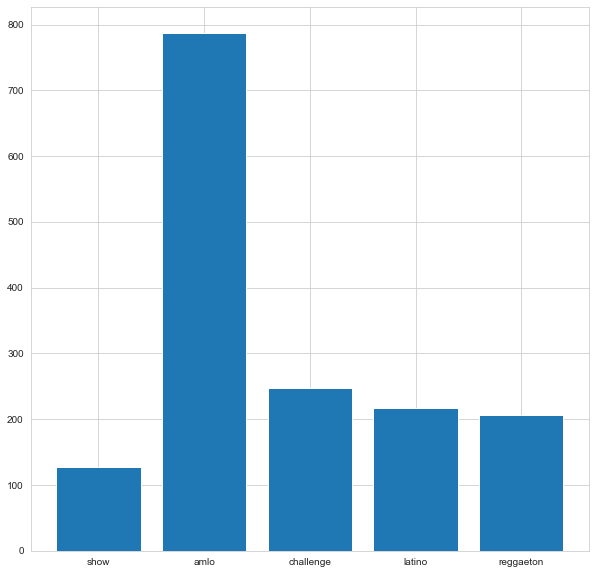

In [263]:
fig = plt.figure(figsize=(10,10))
counts = [128,787,248,217,206]
words = ['show','amlo','challenge','latino','reggaeton']
plt.bar(words,counts)

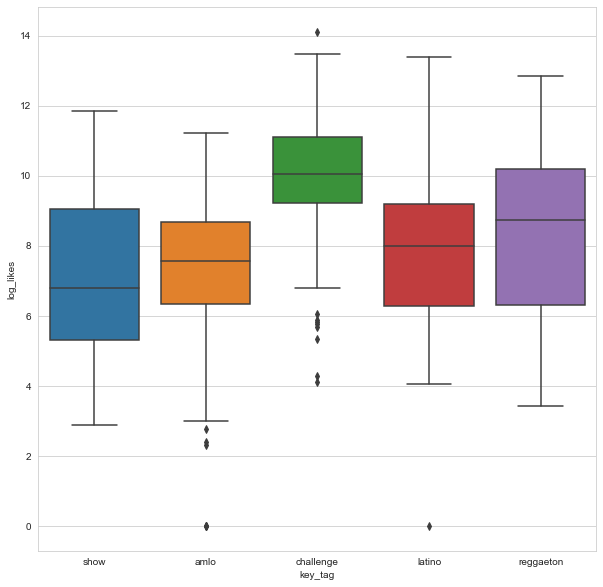

In [260]:
 f, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x="key_tag", y="log_likes", data=new_df)
 

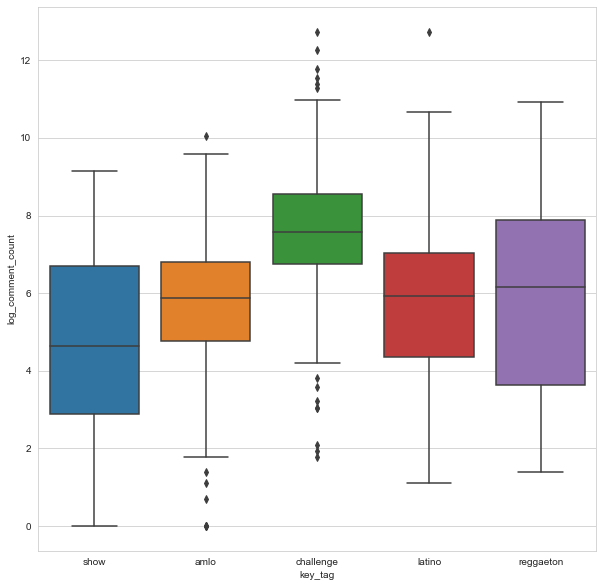

In [261]:
f, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x="key_tag", y="log_comment_count", data=new_df)

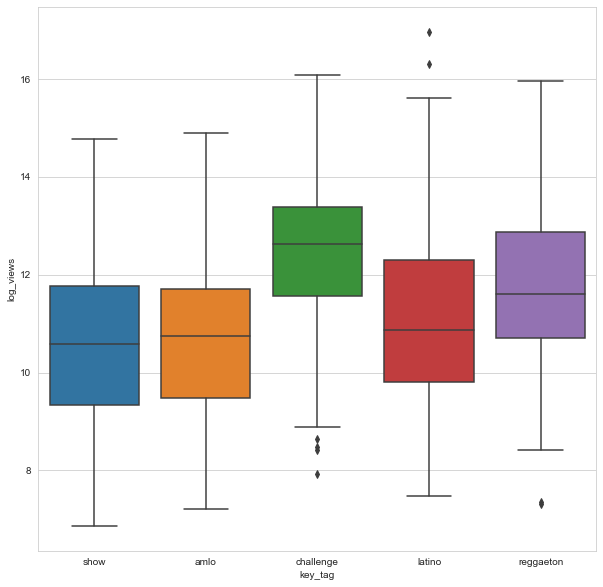

In [262]:
f, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x="key_tag", y="log_views", data=new_df)

# Conclusion
#Youtube is a source of wide hobbies, pastime, and amusement for a majority of viewers often with intersecting categories that range frome Entertainment to Style, creating high traction in topics related with these categories but most in viewership it is used as a source to keep up with current news and keeping up with the political landscape in Mexico's actuality.

In [134]:
counts = df_mexico['tags_list'].value_counts() # find the counts for each unique category
counts

[[none]]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                4052
[4k, el salvador, el salvador 4k, videos, paisajes, naturaleza, don barrabas, gladis, la sirenita, emely, mr bone, nano, maruca, don hueso, norma, normita, don pop, armando, cipitio, don pollo, max, pablito, messi, heidi, candy, lidiona, micky, wendy, nallely, nayeli, travel, world, spanish, gringos, culture, news, salvador, san salvador, life style, campo, vida real, volcanes, rios, lagos, recetas, comida, paz, armonia, compañeros, claudia, mikko, gustavo, tia janeth, pedro, foncho]   

# DATA SET OVERVIEW

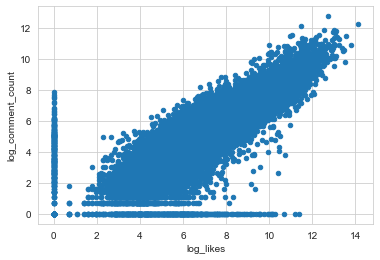

In [156]:
df_mexico.plot.scatter('log_likes', 'log_comment_count')

In [120]:
df[['category','category_id']].groupby('category_id').agg('min')

,category
category_id,
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
19,Travel & Events
20,Gaming
22,People & Blogs
23,Comedy


In [119]:
counts = df_mexico['category'].value_counts()
counts

Entertainment            9575
People & Blogs           5416
Sports                   2820
News & Politics          2225
Howto & Style            2084
Music                    1977
Comedy                   1010
Film & Animation          847
Gaming                    640
Education                 426
Science & Technology      405
Autos & Vehicles          212
Nonprofits & Activism     116
Travel & Events            78
Pets & Animals             66
Shows                       3
Name: category, dtype: int64

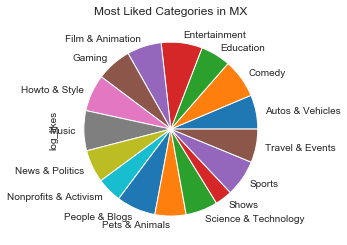

In [205]:
df_mexico.groupby('category')['log_likes'].agg('max').plot(kind='pie',title='Most Liked Categories in MX')

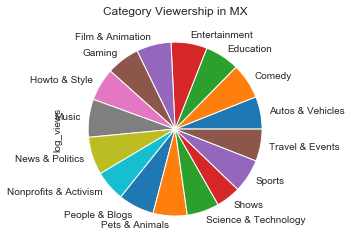

In [207]:
df_mexico.groupby('category')['log_views'].agg('max').plot(kind='pie',title='Category Viewership in MX')